# **Problem Outline**

The study in given research paper examined seven distinct varieties of dry beans and considered the form, shape, kind, and structure of the beans in relation to the market environment. In order to obtain uniform seed categorization, a computer vision system was created to identify between seven different registered types of dry beans with comparable traits. Images of 13,611 grains from 7 different registered dry bean varieties were captured using a high-resolution camera for the classification model. Following segmentation and feature extraction steps on bean pictures obtained using a computer vision system, a total of 16 features—12 dimensions and 4 shape forms—were extracted from the grains.

**The dataset is made up of attributes that describe the shape of the bean, and the objective is to predict the type of bean.**

The general features of the specified dry beans are as follows:

Cali--> It has a white appearance, kidney-shaped seeds that are slightly plumper and larger than dried beans.

Horoz--> These dry beans are long and cylindrical, white in colour, and often medium in size.

Dermason--> Dry beans of this type are more full-flat and white in colour, with rounded ends on both of their ends.

Seker--> White, large seeds with a spherical physical shape.

Bombay--> Its physical characteristics include an oval, protruding shape, large, white seeds, and a white colour.

Barbunya--> It has a huge seedpod and an oval-to-round physical shape. It has a beige background with red stripes or other patterns, or it may be speckled.

Sira--> The tiny, white, flat, one-flat, and one-round seeds have a small size and flat, white, and physical structure.

Below is the description of features in the data.

**1) Area (A)**: The area of a bean zone and the number of pixels within its boundaries.

**2) Perimeter (P)**: Bean circumference is defined as the length of its border.

**3) Major axis length (L)**: The distance between the ends of the longest line that can be drawn from a bean.

**4) Minor axis length (l)**: The longest line that can be drawn from the bean while standing perpendicular to the main axis.

**5) Aspect ratio (K)**: Defines the relationship between L and l.

**6) Eccentricity (Ec)**: Eccentricity of the ellipse having the same moments as the region.

**7) Convex area (C)**: Number of pixels in the smallest convex polygon that can contain the area of a bean seed.

**8) Equivalent diameter (Ed)**: The diameter of a circle having the same area as a bean seed area.

**9) Extent (Ex)**: The ratio of the pixels in the bounding box to the bean area.

**10)Solidity (S)**: Also known as convexity. The ratio of the pixels in the convex shell to those found in beans.

**11)Roundness (R)**: Calculated with the following formula: (4piA)/(P^2)

**12)Compactness (CO)**: Measures the roundness of an object: Ed/L

**13)ShapeFactor1** (SF1)

**14)ShapeFactor2** (SF2)

**15)ShapeFactor3** (SF3)

**16)ShapeFactor4** (SF4)

**17)Class** (Seker, Barbunya, Bombay, Cali, Dermosan, Horoz and Sira)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Defining Libraries**

Importing all the necessary libraries for model preprocessing, training and evaluation.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os,random,math
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,r2_score,confusion_matrix,ConfusionMatrixDisplay,classification_report,roc_auc_score,make_scorer
from scipy import stats
import joblib
random_state=42

# **Importing Data**

In [3]:
drybeans_data= pd.read_excel("/content/drive/MyDrive/Sussex/SEM_2/Machine_Learning/Assignment/DryBeanDataset/Dry_Bean_Dataset.xlsx") #reading the dataset
drybeans_data.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


# **Exploratory Data Analysis**

In [4]:
"""
This function is used to get the general information about dataframe.
Like The number of columns, Unique Values in a colmn, Total Value count, Total Null, Shape, size in a dataframe
"""
def general_info_dataframe(df,name="FULL DATA",column="Class"):
  print(f"{name} Number of unique values in column {column} ",df[column].nunique())
  print("-----------------------------------------------------")
  print(f"{name} unique values in column {column} ",df[column].unique())
  print("-----------------------------------------------------")
  print(f"Number of classes of dry beans in {name}\n",df[column].value_counts())
  print("-----------------------------------------------------")
  print(f"{name} SHAPE",df.shape)
  print("-----------------------------------------------------")
  print(f"{name} Size",df.size)

# general_info_dataframe(train_df,name="TRAIN DATA",column="Class")

In [5]:
"""
This function is used to plot the graph for dataframe and show the value counts for label
"""
def plot_graph(df,dict={},column="Class",label="Label Counts",x_name="Count",y_name="Class"):
  # Count the occurrences of each label
  if len(dict)!=0:
    df[column] = df[column].replace(dict)
  count_number_of_occurence_of_value = df[column].value_counts()

  # Plot the counts as a horizontal bar graph
  axis_data = count_number_of_occurence_of_value.plot(kind='barh', rot=45, fontsize=10, figsize=(8, 6))

  # set the axis labels and title
  axis_data.set_xlabel(x_name)
  axis_data.set_ylabel(y_name)
  axis_data.set_title(label)

  # show the plot
  plt.show()

# plot_graph(drybeans_data,label="Class Counts in Full Data",x_name="Count of label",y_name="Class") # Plotting the Label count in Full data

In [6]:
general_info_dataframe(drybeans_data,name="FULL DATA",column="Class")

FULL DATA Number of unique values in column Class  7
-----------------------------------------------------
FULL DATA unique values in column Class  ['SEKER' 'BARBUNYA' 'BOMBAY' 'CALI' 'HOROZ' 'SIRA' 'DERMASON']
-----------------------------------------------------
Number of classes of dry beans in FULL DATA
 DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: Class, dtype: int64
-----------------------------------------------------
FULL DATA SHAPE (13611, 17)
-----------------------------------------------------
FULL DATA Size 231387


We have total 13611 number of rows and 17 columns in dry beans dataset.

The total size of our dataset is 231387 elements which we get by multiplying number of rows by the number of columns ie.e (13611*17=231387)

There are 7 unique Class in dry beans which are SEKER, BARBUNYA, BOMBAY, CALI, HOROZ, SIRA, DERMASON

In [7]:
drybeans_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

Getting the basic understanding of features is very necessary before performing exploratory data analysis. This will help us in filtering the data while writing the code and will also help us in selecting the correct type of graph based on categorical and numerical variables.

In [8]:
drybeans_data["Class"].describe().T

count        13611
unique           7
top       DERMASON
freq          3546
Name: Class, dtype: object

In [9]:
drybeans_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Area,13611.0,53048.284549,29324.095717,20420.000000,36328.000000,44652.000000,61332.000000,254616.000000
Perimeter,13611.0,855.283459,214.289696,524.736000,703.523500,794.941000,977.213000,1985.370000
MajorAxisLength,13611.0,320.141867,85.694186,183.601165,253.303633,296.883367,376.495012,738.860153
MinorAxisLength,13611.0,202.270714,44.970091,122.512653,175.848170,192.431733,217.031741,460.198497
AspectRation,13611.0,1.583242,0.246678,1.024868,1.432307,1.551124,1.707109,2.430306
Eccentricity,13611.0,0.750895,0.092002,0.218951,0.715928,0.764441,0.810466,0.911423
ConvexArea,13611.0,53768.200206,29774.915817,20684.000000,36714.500000,45178.000000,62294.000000,263261.000000
EquivDiameter,13611.0,253.064220,59.177120,161.243764,215.068003,238.438026,279.446467,569.374358
Extent,13611.0,0.749733,0.049086,0.555315,0.718634,0.759859,0.786851,0.866195
Solidity,13611.0,0.987143,0.004660,0.919246,0.985670,0.988283,0.990013,0.994677


## **Numerical Features**

Seperating the numerical and categorical features for further analysis.

In [10]:
numerical_features=drybeans_data.select_dtypes(include=['int64','float64']).columns.to_list() # Giving dtypes as int64 and float64 to get numerical features
numerical_features

['Area',
 'Perimeter',
 'MajorAxisLength',
 'MinorAxisLength',
 'AspectRation',
 'Eccentricity',
 'ConvexArea',
 'EquivDiameter',
 'Extent',
 'Solidity',
 'roundness',
 'Compactness',
 'ShapeFactor1',
 'ShapeFactor2',
 'ShapeFactor3',
 'ShapeFactor4']

## **Categorical Features**

In [11]:
categorical_features=drybeans_data.select_dtypes(exclude=['int64','float64']).columns.to_list() # Excluding dtypes as int64 and float64 to get categorical features
categorical_features

['Class']

## **Check Null values**

Checking how many columns contain the null values in the given dry beans dataset.

In [12]:
drybeans_data.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

As we can see from above results, that there are no null values in the data.

# **Checking for Duplicates**

In [13]:
drybeans_data.duplicated(subset=None, keep='first').sum() # Checking the number of duplicates in the data

68

There are 68 total duplicates in dry beans dataset.

In [14]:
drybeans_data = drybeans_data.drop_duplicates() #Dropping the duplicatesfrom data for maintaining data quality, consistency, and integrity.
drybeans_data.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


# **Data Visualization**

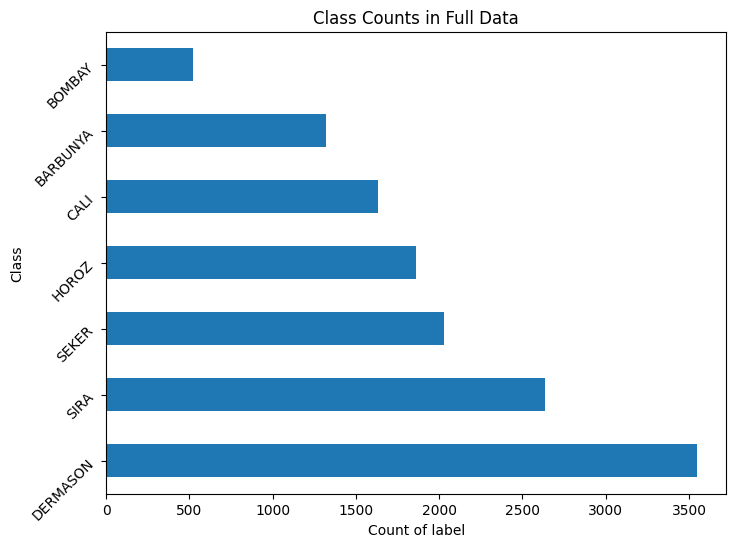

In [15]:
plot_graph(drybeans_data,label="Class Counts in Full Data",x_name="Count of label",y_name="Class") #plotting the graph with the help of plot_graph function

We can notice that there is a imbalance in the data and the number of samples of BOMBAY and BARBUNYA are less, we need to handle this otherwise it can create biased performance of our model.

## **Check Skewness in Data**

If mean and median of the columns are not equal it means that column is skewed. 

Checking skewness by below code.

Skewness is a measure of the asymmetry of a distribution. A distribution is asymmetrical when its left and right side are not mirror images

In [16]:
for feature in numerical_features:  #Checking skewness in the data by comparing mean and median
  print(f"Feature name: {feature} Mean: {drybeans_data[feature].mean()} Median: {drybeans_data[feature].median()}   Skewed: { drybeans_data[feature].median() != drybeans_data[feature].mean()}")

Feature name: Area Mean: 53048.46038543897 Median: 44580.0   Skewed: True
Feature name: Perimeter Mean: 854.9934058923428 Median: 793.896   Skewed: True
Feature name: MajorAxisLength Mean: 319.8956022402454 Median: 296.4045889406183   Skewed: True
Feature name: MinorAxisLength Mean: 202.3653207236778 Median: 192.49111680359582   Skewed: True
Feature name: AspectRation Mean: 1.5810750385172383 Median: 1.5498602522971259   Skewed: True
Feature name: Eccentricity Mean: 0.7503150398340958 Median: 0.7639972803134586   Skewed: True
Feature name: ConvexArea Mean: 53767.98670900096 Median: 45122.0   Skewed: True
Feature name: EquivDiameter Mean: 253.0340943763557 Median: 238.24571119811066   Skewed: True
Feature name: Extent Mean: 0.7498294482545298 Median: 0.7599031515440184   Skewed: True
Feature name: Solidity Mean: 0.9871519229212413 Median: 0.9882875499034979   Skewed: True
Feature name: roundness Mean: 0.8736714769037077 Median: 0.8834898594184397   Skewed: True
Feature name: Compactness

Above analysis shows that all the columns are skewed.

## **Univariate Analysis**

Plotting histplot to understand the distribution of data in that feature.

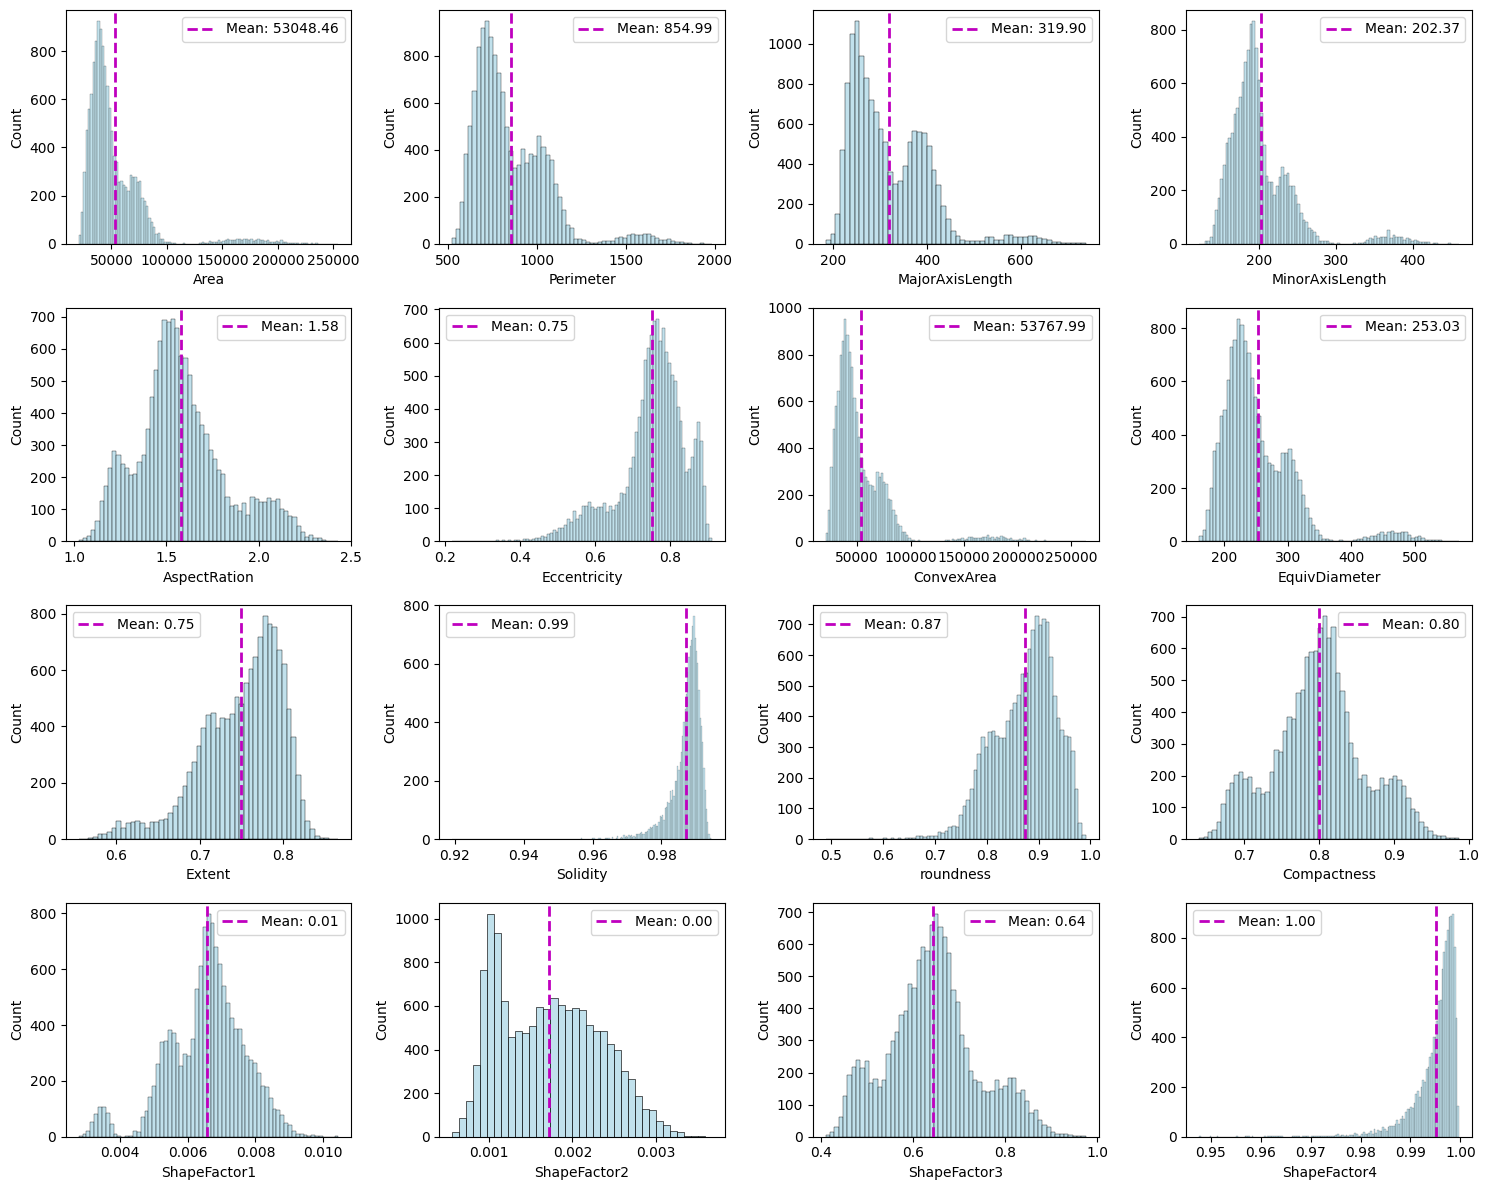

In [17]:
figure, axis_ = plt.subplots(4, 4, figsize=(15, 12))      #Giving 16 subplots as size 
for variable, subplot in zip(numerical_features, axis_.flatten()):  
    setplot = sns.histplot(drybeans_data[variable], ax=subplot, color='lightblue') #Plotting histogram for all the numerical features
    mean = drybeans_data[variable].mean()
    setplot.axvline(x=mean, color='m', label=f'Mean: {mean:.2f}', linestyle='--', linewidth=2)
    setplot.legend()
plt.tight_layout()


The univariate analysis mentioned above demonstrates that our data can be separated since some distributions have skewed shapes and large tails. They are therefore distinct from one another, which is crucial for the classification issue.

## **Bivariate analysis**

Plotting Boxplots to observe Outliers in the data.

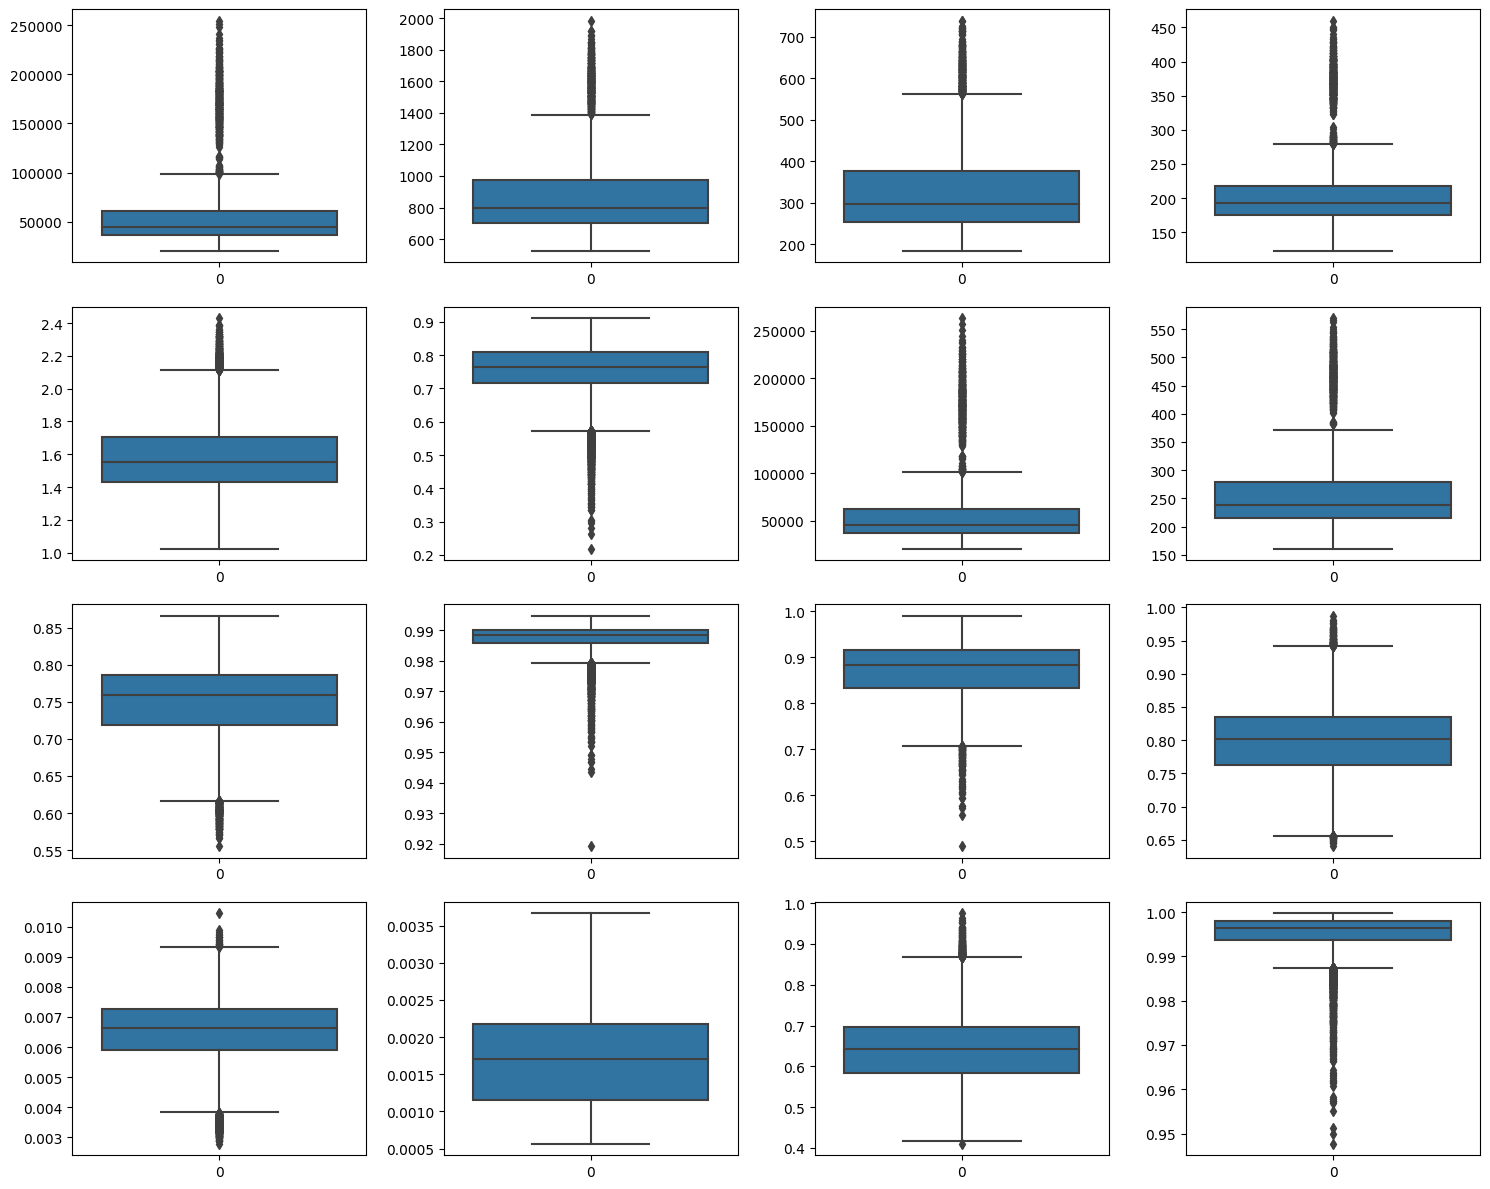

In [18]:
figure, axis_ = plt.subplots(4, 4, figsize=(15, 12))
for variable, subplot in zip(numerical_features, axis_.flatten()):
    setplot=sns.boxplot(drybeans_data[variable],ax=subplot)  # Plot boxplot for all the features
plt.tight_layout()

<Axes: xlabel='Class', ylabel='Area'>

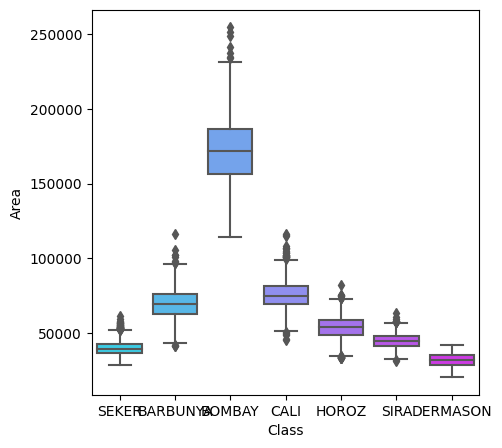

In [19]:
plt.figure(figsize=(5,5))
sns.boxplot(x="Class", y="Area",data=drybeans_data, palette="cool")  # Plotting boxplot for all the classes vs Area 

The dry bean class from BOMBAY has the highest Area, followed by Cali and Barbunya. Dermason and Seker are in the least area.

<Axes: xlabel='Class', ylabel='Perimeter'>

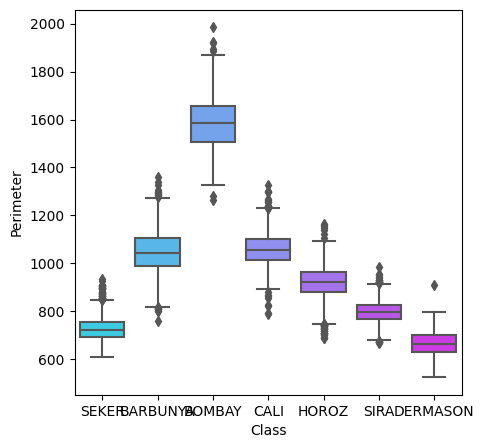

In [20]:
plt.figure(figsize=(5,5))
sns.boxplot(x="Class", y="Perimeter",data=drybeans_data, palette="cool") # Plotting boxplot for all the classes vs Perimeter 

Dry beans from the Bombay class have the highest perimeter, followed by those from Barbunya and Cali. Dermason and Seker have the smallest perimeter.

<Axes: xlabel='Class', ylabel='roundness'>

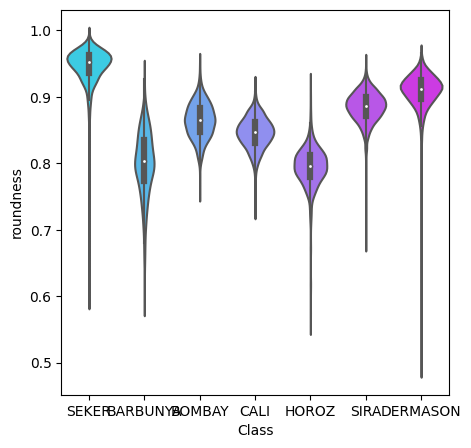

In [21]:
plt.figure(figsize=(5,5))
sns.violinplot(x="Class", y="roundness",data=drybeans_data, palette="cool") # Plotting Violinplot for all the classes vs Area 

The outliers in the data are depicted in the violin plot above. There are many outliers for DERMASON and SEKER.

## **Multivariate analysis**

Plotting pairplot to understand the linear relationship between the features.
It helps us to see patterns or relationships inside the data.

In [22]:
sns.pairplot(drybeans_data, hue='Class', corner=True, palette='coolwarm') # Plotting pairplot for all the features
plt.show()

Output hidden; open in https://colab.research.google.com to view.

We can see a linear trend between many features. The Bombay class is highly distinguished from other classes in several aspects, therefore even though it only makes up a small portion of the information, a model might still be able to classify it accurately. 


# **Data Preprocessing**

In order to effectively interpret and learn from the data, we can express categorical variables as integers by encoding the labels on the variables.

## **Encoding Labels**

In [23]:
label_encoder = preprocessing.LabelEncoder()          # Creating an instance of LabelEncoder
drybeans_data['Class'] = label_encoder.fit_transform(drybeans_data['Class'])      # Encoding the 'Class' column with label encoder
drybeans_data['Class'].unique()

array([5, 0, 1, 2, 4, 6, 3])

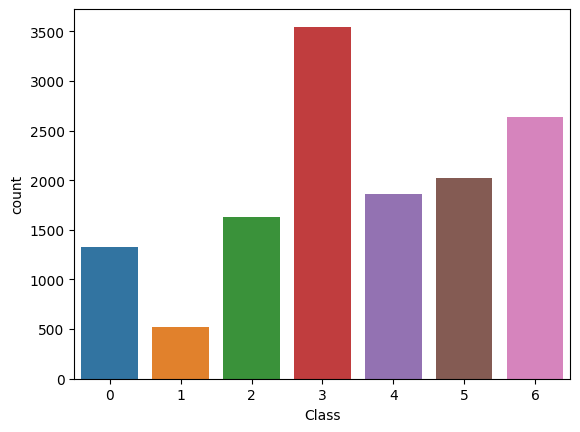

In [24]:
plot_ = sns.countplot(x='Class', data=drybeans_data)       #Plotting countplot for all the classes in data

In [25]:
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))) #Storing label values in a dictionary to be used further 
label_mapping
# decoded_data = label_encoder.inverse_transform(drybeans_data['Class'])
# decoded_data

{'BARBUNYA': 0,
 'BOMBAY': 1,
 'CALI': 2,
 'DERMASON': 3,
 'HOROZ': 4,
 'SEKER': 5,
 'SIRA': 6}

## **Checking correlation**

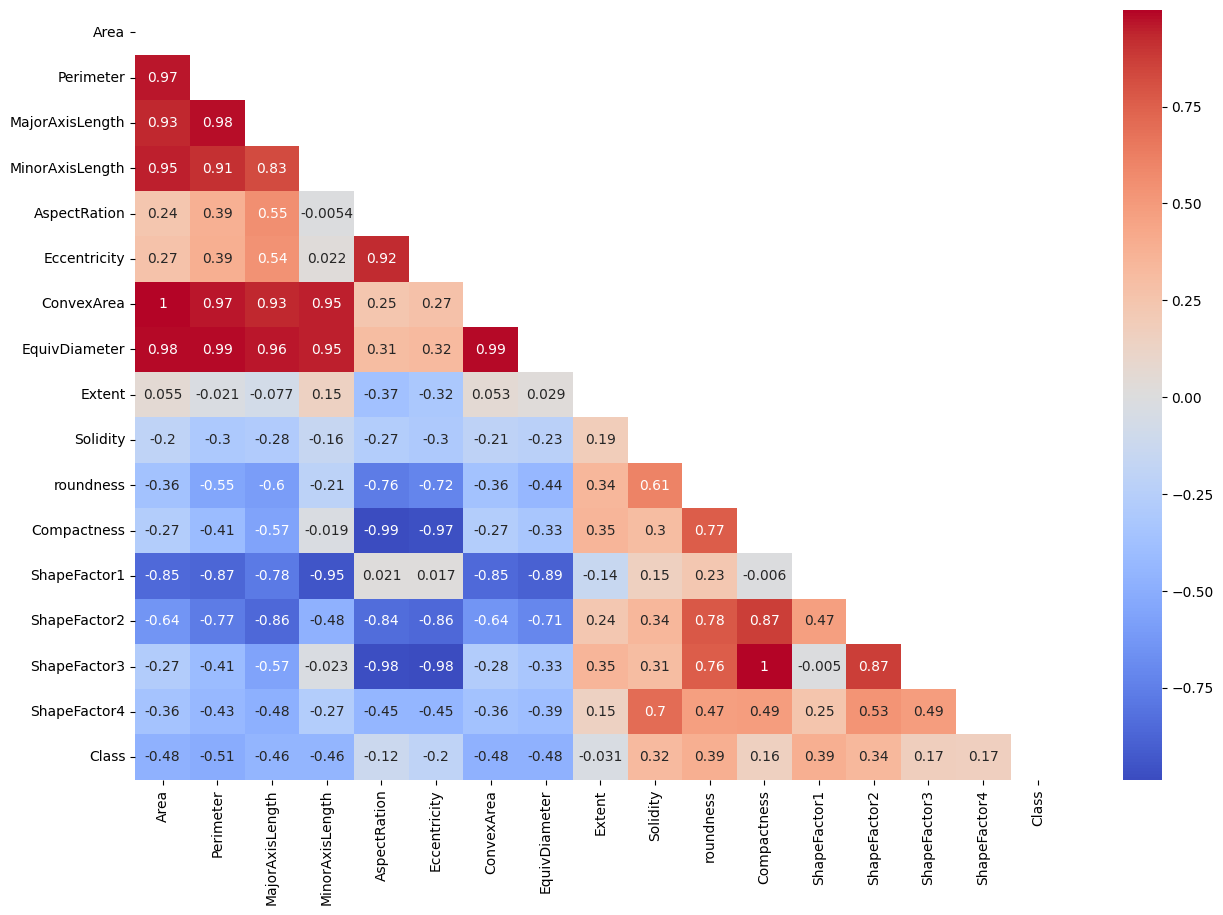

In [26]:
plt.figure(figsize=(15, 10))
# Creating a heatmap of the correlation matrix
sns.heatmap(data=drybeans_data.corr(method='pearson'), cmap='coolwarm', mask=np.triu(drybeans_data.corr()), annot=True)
plt.show()

In the above heatmap lightly colored orange cells show that particular column is positively correlated means as the value of one feature increases/decreases the value of other column also increases/decreases.

Dark colored blue cells show that columns are negatively correlated that means as the value of one feature increases, the value of other decreases.

There are a lot of linearly correlated features in our data, we will list some of them below.

area & convex area : 1.00

compactness and shape factor 3 : 1.00

equivalent diameter and perimeter: 0.99

equivalent diameter and convex area: 0.99

aspect ration and compactness : -0.99

major axis length and perimeter: 0.98

eccentricity and shape factor 3 : -0.98

area and perimeter: 0.97

convex area and perimeter : 0.97

eccentricity and compactness : -0.97





We will use PCA for dimensionality reduction as we can clearly see lot of columns are highly cor-realted here.

## **Data Resampling**

We know that our data is imbalanced. We will use SMOTE to balance our dataset. SMOTE (Synthetic Minority Over-sampling Technique) is an algorithm used for dealing with imbalanced datasets in machine learning. SMOTE helps in generating synthetic samples , this is done by oversampling the minority class by taking the nearest neighbors, interpolating between the choosed example and its neighbors. This helps our algorithm get better accuracy and enabling more effective decision-making.

In [27]:
sm_resample = SMOTE(random_state=42) # Creating an instance of SMOTE with a specified random state

In [28]:
X = drybeans_data.drop('Class', axis=1)  #Dropping target column to store features in X
y = drybeans_data.Class                    #Storing target column in y 

In [29]:
X_sm, y_sm = sm_resample.fit_resample(X, y)  #resample X and y

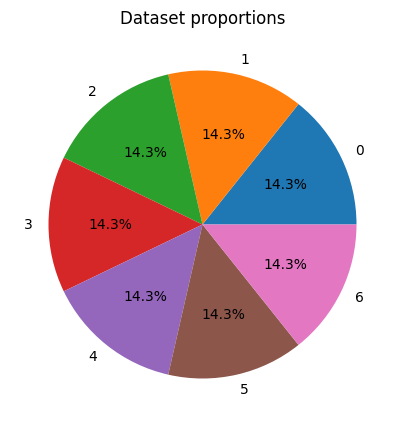

In [30]:
labels, counts = np.unique(y_sm, return_counts=True)
plt.figure(figsize=(5, 5))
plt.pie(counts, autopct='%1.1f%%', labels=labels)               #Plotting pie chart to show the distribution of balanced data
plt.title('Dataset proportions')
plt.show()

Above pie chart shows that we have balanced our data now. We will use this data for further preprocessing and predictions throughout this notebook.

## **Splitting Data in Train and Test set**

In [31]:
X_train , X_test , y_train , y_test = train_test_split(X_sm , y_sm , test_size=0.2,random_state=42) # splitting the data into X train, X test, yy train and y test

In [166]:
y_test.index  #checking the original index of data 

Int64Index([ 5716, 11812,  8487, 19893, 20554, 23694, 12756,  8299, 11866,
            24285,
            ...
             5593, 11947,  3383, 17379, 15607, 23814,  4148,  2662, 20194,
            23181],
           dtype='int64', length=2483)

## **Feature Scaling - Scaling Data using Standardization**

Standardization is important as it helps us to bring our features on same scale. From the data we observed that there is a huge variation in values. The performance, stability, and interpretability of machine learning models are all improved by standardisation. It promotes enhanced convergence of optimisation algorithms, ensures fair comparisons across variables, and lessens the influence of outliers. In order to maximise the use of the data at hand and improve the calibre of the modelling process, it is essential to do this preprocessing phase.This implies that the standard scores' mean and standard deviation will be, respectively, 0 and 1.








In [32]:
std_scaler = StandardScaler()  #creates an instance of the StandardScaler

In [33]:
std_scaler.fit_transform(X_train)  #fits the StandardScaler to the training data X_train and simultaneously applies the transformation. 

array([[-0.05162995,  0.2004845 ,  0.34930546, ..., -0.82779527,
        -1.10664158,  0.39620929],
       [ 2.15546676,  2.03225839,  2.0293857 , ..., -1.19654986,
        -0.29769071, -1.27047428],
       [ 0.1099233 ,  0.47500305,  0.25296908, ..., -0.47950894,
        -0.16250263,  0.33124695],
       ...,
       [-0.68409373, -0.87805091, -1.0178614 , ...,  1.65662929,
         1.71463225,  0.99468487],
       [ 2.62942301,  2.32180049,  2.23815194, ..., -1.18363249,
        -0.00460934,  0.22937289],
       [-0.61371603, -0.77676306, -0.89677418, ...,  1.32503346,
         1.48335326,  0.97273829]])

In [34]:
X_train_scaled = std_scaler.transform(X_train) #apply transformation to train data

In [35]:
X_test_scaled = std_scaler.transform(X_test)  #apply transformation to test data

In [36]:
X_scaled = std_scaler.transform(X_sm)     #apply transformation to X data

# **Experimenting with different Models and Training**

## **SVM**

Support vector classification (SVC) and support vector regression (SVR), often known as support vector machines or SVMs, are supervised learning algorithms that can be used for classification and regression issues.

As the data we have is a small to medium-sized dataset with well-separated classes, SVM can be an excellent solution for our problem. It will help us separate the high-dimensional data and will also enable us to control overfitting. SVM was initially developed for binary class problems before being generalised for problems involving multiple classes of classification.

Given that this is a multi class classification problem, we will utilise the one-vs-one generalised SVM technique. With the one-vs-one method, a classifier is produced for each pair of classes. A new instance is used with binary classifiers, and a majority vote mechanism is used to decide whether to estimate.

In [ ]:
svm_model = SVC()           #Instantiating SVM
svm_model.fit(X_train_scaled, y_train) #Training SVM

In [38]:
svm_model.score(X_test_scaled, y_test) # Testing SVM model

0.9492447129909366

## **Decision Tree**

A supervised machine learning approach known as a decision tree can be applied to both classification and regression applications. On the basis of the unique features of the input data, it constructs a model resembling a tree of decisions and potential outcomes. Each leaf node of the tree represents the result or prediction, while each branch represents a decision rule. Each internal node of the tree represents a feature or attribute. As the decision rules and splits are simple to comprehend and visualise, decision trees are highly interpretable models. Nonlinear relationships between features and the goal variable can be captured using decision trees.The significance of elements in the decision-making process can be determined via decision trees. The most important features that affect the prediction can be found by examining the splits and any accompanying impurity measurements (such as the Gini index or entropy).Both binary and multiclass classification issues can be handled by them. Decision trees can be a helpful modelling strategy if the dataset displays complex, nonlinear patterns.

In [39]:
decisiontree_model=DecisionTreeClassifier() #Instantiating decision tree classifer
decisiontree_model.fit(X_train_scaled, y_train) # Fitdecision tree model 

DecisionTreeClassifier()

In [40]:
decisiontree_model.score(X_test_scaled, y_test)   # Testing decision tree model

0.9289023162134945

## **KNN**

The supervised machine learning algorithm K-Nearest Neighbours (KNN) is utilised for both classification and regression applications. It is a non-parametric algorithm that bases its predictions on how closely the new data point resembles its immediate surroundings. It is crucial to keep in mind how crucial it is to choose the appropriate value for K (the number of neighbours). KNN is widely used for classification problems when the target variable is categorical. When members of the same class are located close to one another in the feature space, it works well.KNN is appropriate for small to medium-sized datasets because it needs calculating the distances between data points, and the computational cost rises with the size of the dataset. While a big K value can smooth out the decision boundaries and potentially disregard local patterns, a short K value can cause overfitting and render the model susceptible to noise.

In [41]:
knn_model=KNeighborsClassifier(n_neighbors = 3) # Instantiating knn classifier as n neighbors equals 3 
knn_model.fit(X_train, y_train)                   # Fit Knn classifier 

KNeighborsClassifier(n_neighbors=3)

In [42]:
knn_model.score(X_test,y_test)           # Testing Knn classifier

0.8557905337361531

# **Dimensionality Reduction using PCA**

A dimensionality-reduction method used in data analysis and machine learning is principal component analysis (PCA). It is used to reduce the number of dimensions in a high-dimensional dataset while keeping the most significant facts or patterns.  It is applied to high-dimensional data, noise reduction, feature engineering, and the reduction of model complexity. It can offer insightful information, make analysis simpler, and enhance the effectiveness of machine learning models. When referring to the number of components in PCA, it is meant to indicate the number of primary components that are kept after the data have undergone the PCA transformation. The principal components are new variables in PCA that are created by combining the original variables in linear fashion. The most variation in the data is captured by these elements.

In [43]:
# Function to evaluate different numbers of components in PCA for a given model
def get_best_components_from_pca(model_name="SVM",test_size=0.2): 
   # Loop over each number of components
  pca_components=[4,5,6,9,11,14,16]
  pca_score =[]
  accuracy_after_pca=[]
  for num in pca_components:
    # Create a PCA object with the specified number of components
    pca = PCA(n_components=num)
     # Apply PCA transformation to the scaled data
    x_pca = pca.fit_transform(X_scaled)
    # Print the shape of the transformed data
    print("Shape: ",x_pca.shape)
     # Split the data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(x_pca,y_sm,test_size=test_size,random_state=42)
     # Create the specified model based on the given model_name
    if model_name=="SVM":
      model = SVC()
    elif model_name=="DecisionTree":
      model = DecisionTreeClassifier()
    else:
      model = KNeighborsClassifier(n_neighbors = 3)
    # Fit the model on the training data
    model.fit(X_train, y_train)
    # Evaluate the model's score after PCA transformation
    score_after_pca=model.score(X_test, y_test)
    pca_score.append(score_after_pca)
    # Predict the labels for the test data
    y_test_predicted = model.predict(X_test)
    # Calculate the accuracy of the model on the test data
    model_accuracy_test = accuracy_score(y_test, y_test_predicted)
    accuracy_after_pca.append(model_accuracy_test)

  # Create a DataFrame to store the results
  df = pd.DataFrame({'Number_of_Components_in_PCA': pca_components, 'PCA_Score': pca_score, 'Model_Accuracy_after_PCA': accuracy_after_pca})
  return df

## **Experimenting with different train test split number of data and number of components for PCA**

### **SVM - train test split number of data and number of components for PCA**

In [44]:
get_pca_score_svm=get_best_components_from_pca(model_name="SVM",test_size=0.3)  # splitting with test size as 0.3 and calling get_best_components_from_pca function
get_pca_score_svm

Shape:  (24822, 4)
Shape:  (24822, 5)
Shape:  (24822, 6)
Shape:  (24822, 9)
Shape:  (24822, 11)
Shape:  (24822, 14)
Shape:  (24822, 16)


,Number_of_Components_in_PCA,PCA_Score,Model_Accuracy_after_PCA
0,4,0.915134,0.915134
1,5,0.948033,0.948033
2,6,0.947496,0.947496
3,9,0.948436,0.948436
4,11,0.948301,0.948301
5,14,0.948301,0.948301
6,16,0.948301,0.948301


In [45]:
get_pca_score_svm=get_best_components_from_pca(model_name="SVM",test_size=0.2)# splitting with test size as 0.2 and calling get_best_components_from_pca function
get_pca_score_svm

Shape:  (24822, 4)
Shape:  (24822, 5)
Shape:  (24822, 6)
Shape:  (24822, 9)
Shape:  (24822, 11)
Shape:  (24822, 14)
Shape:  (24822, 16)


,Number_of_Components_in_PCA,PCA_Score,Model_Accuracy_after_PCA
0,4,0.912588,0.912588
1,5,0.947835,0.947835
2,6,0.948036,0.948036
3,9,0.949245,0.949245
4,11,0.949245,0.949245
5,14,0.949245,0.949245
6,16,0.949245,0.949245


In [46]:
get_pca_score_svm=get_best_components_from_pca(model_name="SVM",test_size=0.1) # splitting with test size as 0.1 and calling get_best_components_from_pca function
get_pca_score_svm

Shape:  (24822, 4)
Shape:  (24822, 5)
Shape:  (24822, 6)
Shape:  (24822, 9)
Shape:  (24822, 11)
Shape:  (24822, 14)
Shape:  (24822, 16)


,Number_of_Components_in_PCA,PCA_Score,Model_Accuracy_after_PCA
0,4,0.915425,0.915425
1,5,0.951671,0.951671
2,6,0.952880,0.952880
3,9,0.954088,0.954088
4,11,0.954491,0.954491
5,14,0.954491,0.954491
6,16,0.954491,0.954491


### **Decision Tree - train test split number of data and number of components for PCA**

In [47]:
get_pca_score_dt=get_best_components_from_pca(model_name="DecisionTree",test_size=0.3)# splitting with test size as 0.3 and calling get_best_components_from_pca function
get_pca_score_dt

Shape:  (24822, 4)
Shape:  (24822, 5)
Shape:  (24822, 6)
Shape:  (24822, 9)
Shape:  (24822, 11)
Shape:  (24822, 14)
Shape:  (24822, 16)


,Number_of_Components_in_PCA,PCA_Score,Model_Accuracy_after_PCA
0,4,0.887740,0.887740
1,5,0.928696,0.928696
2,6,0.925339,0.925339
3,9,0.927488,0.927488
4,11,0.933933,0.933933
5,14,0.932053,0.932053
6,16,0.932187,0.932187


In [48]:
get_pca_score_dt=get_best_components_from_pca(model_name="DecisionTree",test_size=0.2)# splitting with test size as 0.2 and calling get_best_components_from_pca function
get_pca_score_dt

Shape:  (24822, 4)
Shape:  (24822, 5)
Shape:  (24822, 6)
Shape:  (24822, 9)
Shape:  (24822, 11)
Shape:  (24822, 14)
Shape:  (24822, 16)


,Number_of_Components_in_PCA,PCA_Score,Model_Accuracy_after_PCA
0,4,0.884189,0.884189
1,5,0.924471,0.924471
2,6,0.926083,0.926083
3,9,0.927895,0.927895
4,11,0.934139,0.934139
5,14,0.931319,0.931319
6,16,0.926687,0.926687


In [49]:
get_pca_score_dt=get_best_components_from_pca(model_name="DecisionTree",test_size=0.1)# splitting with test size as 0.1 and calling get_best_components_from_pca function
get_pca_score_dt

Shape:  (24822, 4)
Shape:  (24822, 5)
Shape:  (24822, 6)
Shape:  (24822, 9)
Shape:  (24822, 11)
Shape:  (24822, 14)
Shape:  (24822, 16)


,Number_of_Components_in_PCA,PCA_Score,Model_Accuracy_after_PCA
0,4,0.889650,0.889650
1,5,0.931937,0.931937
2,6,0.931534,0.931534
3,9,0.937576,0.937576
4,11,0.940395,0.940395
5,14,0.932743,0.932743
6,16,0.931534,0.931534


### **KNN - train test split number of data and number of components for PCA**

In [50]:
get_pca_score_knn=get_best_components_from_pca(test_size=0.3) # splitting with test size as 0.3 and calling get_best_components_from_pca function
get_pca_score_knn

Shape:  (24822, 4)
Shape:  (24822, 5)
Shape:  (24822, 6)
Shape:  (24822, 9)
Shape:  (24822, 11)
Shape:  (24822, 14)
Shape:  (24822, 16)


,Number_of_Components_in_PCA,PCA_Score,Model_Accuracy_after_PCA
0,4,0.915134,0.915134
1,5,0.948033,0.948033
2,6,0.947496,0.947496
3,9,0.948436,0.948436
4,11,0.948301,0.948301
5,14,0.948301,0.948301
6,16,0.948301,0.948301


In [51]:
get_pca_score_knn=get_best_components_from_pca(test_size=0.2) # splitting with test size as 0.2 and calling get_best_components_from_pca function
get_pca_score_knn

Shape:  (24822, 4)
Shape:  (24822, 5)
Shape:  (24822, 6)
Shape:  (24822, 9)
Shape:  (24822, 11)
Shape:  (24822, 14)
Shape:  (24822, 16)


,Number_of_Components_in_PCA,PCA_Score,Model_Accuracy_after_PCA
0,4,0.912588,0.912588
1,5,0.947835,0.947835
2,6,0.948036,0.948036
3,9,0.949245,0.949245
4,11,0.949245,0.949245
5,14,0.949245,0.949245
6,16,0.949245,0.949245


In [52]:
get_pca_score_knn=get_best_components_from_pca(test_size=0.1) # splitting with test size as 0.1 and calling get_best_components_from_pca function
get_pca_score_knn

Shape:  (24822, 4)
Shape:  (24822, 5)
Shape:  (24822, 6)
Shape:  (24822, 9)
Shape:  (24822, 11)
Shape:  (24822, 14)
Shape:  (24822, 16)


,Number_of_Components_in_PCA,PCA_Score,Model_Accuracy_after_PCA
0,4,0.915425,0.915425
1,5,0.951671,0.951671
2,6,0.952880,0.952880
3,9,0.954088,0.954088
4,11,0.954491,0.954491
5,14,0.954491,0.954491
6,16,0.954491,0.954491


In [53]:
#['MajorAxisLength', 'ShapeFactor2', 'Perimeter', 'EquivDiameter', 'ConvexArea', 'Area', 'roundness', 'ShapeFactor3', 'Eccentricity', 'Compactness', 'AspectRation', 'ShapeFactor4', 'MinorAxisLength', 'ShapeFactor1', 'Solidity', 'Extent']

In the last section, I tried out various splits of training and test data of different sizes and compared them with all the models I planned to use for this data. We clearly see that the optimal conditions for all three of the models we'll be using are if the test size is 0.1 as well as when the number of components is 9. If we use more components than 9, accuracy isn't impacted significantly much. 

In [54]:
pca = PCA(n_components=9)       # PCA transformation with 9 components    
x_pca = pca.fit_transform(X_scaled)  #Apply the PCA transformation to the scaled data 

In [55]:
X_train, X_test, y_train, y_test = train_test_split(x_pca,y_sm,test_size=0.1,random_state=42)  # Splitting the data in train test according to number obtained from above experimentation

# **Cross Validation**

A machine learning approach called cross-validation is used to assess a model's performance and generalizability. It requires iteratively training and assessing the model on various combinations of the subsets created by partitioning the available dataset into numerous subsets or folds. For gauging performance, fine-tuning hyperparameters, and determining generalisation, cross-validation is a useful machine learning technique. It assists in achieving a more accurate assessment of a model's performance and in the formulation of well-informed model development decisions. The most popular technique is k-fold cross-validation, in which the data are separated into k folds of equal size. The model is tested on the final fold after being trained on a set of k-1 folds. A different fold is used as the validation set each time, and the ones that remain serve as the training set. This process is performed k times in total. The evaluation measure of interest is computed on each validation set to determine the model's effectiveness. Typically, an estimate of overall performance is obtained by averaging the findings from each fold.

In [56]:
model = SVC(C=1, gamma=0.4)
svm_onevsone_model = OneVsOneClassifier(model)
svm_onevsone_model.fit(X_train, y_train)
svm_onevsone_model.score(X_test, y_test)

0.9565042287555376

### **Experimenting with different cross validation numbers for SVM model**

In [57]:
scores_svm = cross_val_score(svm_onevsone_model, X_train, y_train, cv=5, scoring='f1_micro')  # Giving scorer as f1 micro and k folds as 5 
scores_svm.mean()

0.9524151446627702

In [58]:
scores_svm = cross_val_score(svm_onevsone_model, X_train, y_train, cv=8, scoring='f1_micro') # Giving scorer as f1 micro and k folds as 8
scores_svm.mean() 

0.9527730533096966

In [59]:
scores_svm = cross_val_score(svm_onevsone_model, X_train, y_train, cv=10, scoring='f1_micro') # Giving scorer as f1 micro and k folds as 10
scores_svm.mean()

0.9527730458039475

### **Experimenting with different cross validation numbers for Decision Tree model**

In [60]:
scores_dt = cross_val_score(decisiontree_model, X_train, y_train, cv=5, scoring='f1_micro') # Giving scorer as f1 micro and k folds as 5 
scores_dt.mean()

0.9272573927692965

In [61]:
scores_dt = cross_val_score(decisiontree_model, X_train, y_train, cv=8, scoring='f1_micro') # Giving scorer as f1 micro and k folds as 8
scores_dt.mean()

0.926854622485399

In [62]:
scores_dt = cross_val_score(decisiontree_model, X_train, y_train, cv=10, scoring='f1_micro') # Giving scorer as f1 micro and k folds as 10
scores_dt.mean()

0.9296746811981584

### **Experimenting with different cross validation numbers for KNN model**

In [63]:
scores = cross_val_score(knn_model, X_train, y_train, cv=5, scoring='f1_micro') # Giving scorer as f1 micro and k folds as 5 
scores.mean()

0.9483863161242727

In [64]:
scores = cross_val_score(knn_model, X_train, y_train, cv=8, scoring='f1_micro') # Giving scorer as f1 micro and k folds as 8
scores.mean()

0.9494606732754932

In [65]:
scores = cross_val_score(knn_model, X_train, y_train, cv=10, scoring='f1_micro') # Giving scorer as f1 micro and k folds as 10
scores.mean()

0.9490129340915006

Above experiments with all three model shows that cross validation of 8 folds work best for our models.

# **Hyper Parameter Tuning by Using GridSearchCV**

The optimum parameter combination is produced by GridSearchCV based on a score metric of our choice after it runs through all the possible parameters that are supplied into the parameter grid. Technically speaking, the "best" parameters that GridSearchCV identifies are only possible combinations of the parameters that we put in our parameter grid. It takes a long time because it attempts every combination of the provided hyperparameter, making it only suited for small to medium sized datasets.We specify the hyperparameter grid and the number of cross-validation folds. The training data is divided into several folds, the model is trained on a portion of the data, and the performance of the model is assessed on the remaining fold. Inferring how well the model will generalise to new data using this information is helpful. GridSearchCV assists in locating the optimum hyperparameters that maximise the performance of the model by doing an exhaustive search over the given hyperparameter grid. 
This method makes sure the model is calibrated for best performance and helps to avoid manual assumptions.


## **SVM**

In [66]:
svm_model = SVC()
svm_onevsone_model = OneVsOneClassifier(svm_model)          # Initializing One-vs_One SVM  
svm_params=svm_onevsone_model.get_params()        # Getting list of params in SVM 
svm_params_df = pd.DataFrame(svm_params, index=[0])
svm_params_df.T

,0
estimator__C,1.0
estimator__break_ties,False
estimator__cache_size,200
estimator__class_weight,None
estimator__coef0,0.0
estimator__decision_function_shape,ovr
estimator__degree,3
estimator__gamma,scale
estimator__kernel,rbf
estimator__max_iter,-1


Below are the hyperparameters for SVM which we will tune:

**C (Regularisation parameter):**  The trade-off between maximising the margin and reducing the training error is controlled by the hyperparameter C. A lower C value permits a broader margin but could lead to more incorrectly categorised training samples. A bigger C value, on the other hand, tries to accurately categorise every training example by allowing a narrower margin. To put it another way, a higher C value emphasises the need of reducing training errors.
Finding the right number for C is crucial to avoiding either overfitting or underfitting. A high C value may indicate overfitting, in which the model tries to fit the training data too closely and may not generalise effectively to new data. A low C value, on the other hand, can result in underfitting, where the model fails to recognise the underlying trends in the data. 


**Kernel:**  In SVMs, kernel functions are essential because they turn the input data into a higher-dimensional feature space, which may make it easier to separate the classes. Depending on the data, the best kernel function will be determined.

**RBF (Radial Basis Function) Kernel:** Due to its ability to capture intricate non-linear decision boundaries, the RBF kernel is a common option for SVMs. The decision boundary can be a very adaptable, non-linear surface; thanks to the RBF kernel, which enables SVMs to translate the data into an infinite-dimensional feature space. Gamma is a hyperparameter that regulates the RBF kernel and controls how much each training example affects the decision boundary.

**Polynomial Kernel:** Another choice for SVMs is the polynomial kernel function. It is especially helpful when there is a non-linear relationship between the features in the data. Finding polynomial decision boundaries in the feature space is made possible by the polynomial kernel in SVMs. The degree of the polynomial is a hyperparameter that affects the decision boundary's flexibility and complexity.


In [67]:
#List Hyperparameters that we want to tune.
estimator__C = [0.1,1,10]
estimator__kernel=['poly', 'rbf']
svm_model = SVC()
svm_onevsone_model = OneVsOneClassifier(svm_model)

#Convert to dictionary
hyperparameters = dict(estimator__C=estimator__C,estimator__kernel=estimator__kernel)

# Giving accuracy as scorer
scorer =  'accuracy'

In [68]:
svm_clf = GridSearchCV(svm_onevsone_model,hyperparameters,scoring=scorer,cv=8) # Giving model , hyperparameters and cross validation as 8 

In [69]:
svm_best_model = svm_clf.fit(X_train, y_train)  # Training the classifier 

In [70]:
svm_best_params = svm_clf.best_params_   # Getting the best parameters 

In [71]:
#Print The value of best Hyperparameters
print('Best C value:', svm_best_model.best_estimator_.get_params()['estimator__C'])
print('Best kernel:', svm_best_model.best_estimator_.get_params()['estimator__kernel'])

Best C value: 10
Best kernel: rbf


In [72]:
svm_model = SVC(C=10,kernel="rbf")   # Training the model on best hyper parameters we get for our data
svm_optimized_model = OneVsOneClassifier(svm_model)
svm_optimized_model.fit(X_train, y_train)

OneVsOneClassifier(estimator=SVC(C=10))

In [73]:
print("Model score for SVM",svm_optimized_model.score(X_test,y_test))  # Getting the score of model

Model score for SVM 0.9532823197744664


In [74]:
y_train_pred_svm=svm_optimized_model.predict(X_train)  # Predict the X train from best model

In [75]:
y_test_pred_svm=svm_optimized_model.predict(X_test)
print("F1 score for SVM", f1_score(y_test, y_test_pred_svm,  average='micro')) # Giving average as micro and finding F1 score for model

F1 score for SVM 0.9532823197744664


## **Decision Tree**

Below are the hyperparameters for Decision Tree which we will tune:

**Criterion:** Each node in the decision tree has a split quality that is determined by the criterion hyperparameter. Gini and entropy have been provided as two alternatives in this situation. The Gini impurity, or "Gini," calculates the likelihood of erroneously classifying an element taken at random from a set of elements. The term "entropy" relates to the information gain, which calculates how much information or uncertainty is present in the data. The best split for the decision tree is chosen using the criterion, which is used to evaluate and rank the splits. 

**Max Depth:** The maximum depth or level of the decision tree is specified by the max_depth hyperparameter. It restricts the number of nodes from the root to the furthest leaf. Limiting the depth can reduce overfitting and enhance generalisation. Four values are given in the example: 1, 5, 10, and 15. One of these values will serve as the decision tree's maximum depth.

**Min Samples Leaf:**The min_samples_leaf hyperparameter sets the bare minimum of samples that must be present at a leaf node. It influences the complexity and generalizability of the decision tree as well as the minimum size of a leaf node. The decision tree can avoid making nodes with very few occurrences, which might lead to overfitting, by specifying a minimum number of samples. Four values are supplied in the example: 1, 2, 4, and 6. The bare minimum number of samples needed for a leaf node is determined by each of these parameters.

**Class Weight:** Class imbalance in the decision tree classifier is handled according to the class_weight hyperparameter. It can be adjusted to "balanced" or "None." When set to None, the training process treats every class equally. On the other hand, when the setting is "balanced," the class weights are changed in a way that is inversely proportional to the input data's class frequencies. This aids in addressing the problem of unbalanced datasets, when some classes have a disproportionately small number of examples.

In [76]:
decisiontree_model = DecisionTreeClassifier()
decisiontree_params=decisiontree_model.get_params()  # Getting list of params in Decision Tree 
decisiontree_params_df = pd.DataFrame(decisiontree_params, index=[0])
decisiontree_params_df.T

,0
ccp_alpha,0.0
class_weight,None
criterion,gini
max_depth,None
max_features,None
max_leaf_nodes,None
min_impurity_decrease,0.0
min_samples_leaf,1
min_samples_split,2
min_weight_fraction_leaf,0.0


In [77]:
#List Hyperparameters that we want to tune.
criterion = ['gini', 'entropy']
max_depth=[1, 5, 10, 15]
min_samples_leaf= [1, 2, 4,6]
class_weight=[None, 'balanced'] 

decisiontree_model = DecisionTreeClassifier()

#Convert to dictionary
hyperparameters = dict(criterion=criterion, max_depth=max_depth,min_samples_leaf=min_samples_leaf,class_weight=class_weight)

# Create a scorer object using the f1_micro function, helps to calculate harmonic mean of precision and recall, but it aggregates the scores at the micro-average level.
#As we want to give equal importance to each instance in the dataset, 'f1_micro' scorer is useful. It treats all instances as equal and does not favor any particular class.
scorer =  'f1_micro'                

In [78]:
decisiontree_clf = GridSearchCV(decisiontree_model,hyperparameters,scoring=scorer,cv=8) # Giving model , hyperparameters and cross validation as 8 

In [79]:
decisiontree_best_model = decisiontree_clf.fit(X_train, y_train)       # Train the grid search classifier

In [80]:
decisiontree_best_params = decisiontree_clf.best_params_             # Getting the best parameters 

In [81]:
#Print The value of best Hyperparameters
print('Best criterion:', decisiontree_best_model.best_estimator_.get_params()['criterion'])
print('Best max_depth:', decisiontree_best_model.best_estimator_.get_params()['max_depth'])
print('Best min_samples_leaf:', decisiontree_best_model.best_estimator_.get_params()['min_samples_leaf'])
print('Best class_weight:', decisiontree_best_model.best_estimator_.get_params()['class_weight'])

Best criterion: entropy
Best max_depth: 10
Best min_samples_leaf: 2
Best class_weight: None


In [82]:
decisiontree_optimized_model = DecisionTreeClassifier(**decisiontree_best_params) # Training the model on best hyper parameters we get for our data
decisiontree_optimized_model.fit(X_train, y_train)               

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=2)

In [83]:
print("Model score for decision Tree",decisiontree_optimized_model.score(X_test,y_test))  # Getting the score of model

Model score for decision Tree 0.9387837293596456


In [84]:
y_train_pred_decisiontree=decisiontree_optimized_model.predict(X_train) # Predict the X train from best model

In [85]:
y_test_pred_decisiontree=decisiontree_optimized_model.predict(X_test)
print("F1 score for decision Tree", f1_score(y_test, y_test_pred_decisiontree,  average='micro')) # Giving average as micro and finding F1 score for model

F1 score for decision Tree 0.9387837293596456


## **KNN**

Below are the hyperparameters for KNN which we will tune: 

**n_neighbors** : The n_neighbors hyperparameter defines how many closest neighbours should be taken into account when categorising a new data point. A list of values is given in this instance: [3, 5, 7, 9, 11, 13, 15, 16, 17, 19]. The amount of neighbours to take into account is represented by each value. The KNN model's ability to balance bias and variance depends on the value chosen for n_neighbors. Larger values produce a smoother but potentially oversimplified choice border, whereas smaller values produce a more flexible but potentially noisier decision boundary.Smaller numbers result in a more flexible and maybe noisier choice border, whereas bigger values produce a smoother but potentially oversimplified decision boundary.


**p**: The distance metric for the KNN algorithm is chosen using the p hyperparameter. It stands in for the Minkowski distance metric's power parameter. There are two values given in this instance: [1, 2]. The Manhattan distance, also referred to as the L1 distance, determines the total absolute difference between the coordinates of two points when p=1. The Euclidean distance (L2 distance), which computes the square root of the sum of squared differences between the coordinates of two points, is used by the algorithm when p=2. The type of data and the issue at hand influence the choice of p.


**leaf_size**: The number of samples at which the KNN algorithm shifts from brute-force searching to a more effective approach is controlled by the leaf_size hyperparameter. It has an impact on the KNN algorithm's speed and memory requirements. Three values are given in this example: [15, 20, 30]. The procedure can be sped up by using larger leaf_size numbers, although the results may be a little less precise.


**weights**: The neighbours' contributions are given a certain weight when predictions are made, which is controlled by the weights hyperparameter. It can be set to "distance" or "uniform." All neighbours are given the same weight with "uniform." Closer neighbours are given more weight when 'distance' is present than farther neighbours. The choice between "distance" and "uniform" hinges on the underlying presumption on the significance of nearby places throughout the decision-making process.



In [86]:
knn_model = KNeighborsClassifier(n_neighbors = 3)
knn_params=knn_model.get_params()       # Getting list of params in KNN
knn_params_df = pd.DataFrame(knn_params, index=[0])
knn_params_df.T

,0
algorithm,auto
leaf_size,30
metric,minkowski
metric_params,None
n_jobs,None
n_neighbors,3
p,2
weights,uniform


In [87]:
#List Hyperparameters that we want to tune.
n_neighbors = [3,5,7,9,11,13,15,16,17,19]
p=[1,2]
leaf_size=[15,20,30]
weights=['uniform', 'distance']
knn_model = KNeighborsClassifier()

#Convert to dictionary
hyperparameters = dict(n_neighbors=n_neighbors, p=p,weights=weights)

# Create a scorer object using the f1_micro function
scorer =  'f1_micro'

In [88]:
knn_clf = GridSearchCV(knn_model,hyperparameters,scoring=scorer,cv=8)  # Giving model , hyperparameters and cross validation as 8 

In [89]:
knn_best_model = knn_clf.fit(X_train, y_train) # Train the grid search classifier

In [90]:
knn_best_params = knn_clf.best_params_       # Getting the best parameters 

In [91]:
#Print The value of best Hyperparameters
print('Best leaf_size:', knn_best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', knn_best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', knn_best_model.best_estimator_.get_params()['n_neighbors'])
print('Best weights:', knn_best_model.best_estimator_.get_params()['weights'])

Best leaf_size: 30
Best p: 1
Best n_neighbors: 7
Best weights: distance


In [92]:
knn_optimized_model = KNeighborsClassifier(**knn_best_params) # Training the model on best hyper parameters we get for our data
knn_optimized_model.fit(X_train, y_train) 

KNeighborsClassifier(n_neighbors=7, p=1, weights='distance')

In [93]:
print("Model score for KNN",knn_optimized_model.score(X_test,y_test)) # Getting the score of model

Model score for KNN 0.9552960128876359


In [94]:
y_train_pred_knn=knn_optimized_model.predict(X_train)       # Predict the X train from best model

In [95]:
y_test_pred_knn=knn_optimized_model.predict(X_test)
print("F1 score for decision Tree", f1_score(y_test, y_test_pred_knn,  average='micro')) # Giving average as micro and finding F1 score for model

F1 score for decision Tree 0.9552960128876359


## **Model Evaluation**

We get  Accuracy, Precision, Recall, F1 Score by calling the pre defined methods from sklearn. We want to always maximize True Positives and True Negatives and minimize False Positives and False Negatives.

---
**True Positives (TP)** - These are the correctly predicted positive values which means that the value of actual class is true and the value of predicted class is also true. 

E.g. if actual class value indicates that this passenger survived and predicted class tells you the same thing.

**True Negatives (TN)** - These are the correctly predicted negative values which means that the value of actual class is false and value of predicted class is also false. 

E.g. if actual class says this passenger did not survive and predicted class tells you the same thing.

False positives and false negatives, these values occur when your actual class contradicts with the predicted class.

**False Positives (FP)** – When actual class is false and predicted class is true. 

E.g. if actual class says this passenger did not survive but predicted class tells you that this passenger will survive.

**False Negatives (FN)** – When actual class is true but predicted class is false.

 E.g. if actual class value indicates that this passenger survived and predicted class tells you that passenger will die.

---

### **Accuracy**

1.    Accuracy is a  ratio of correctly predicted observation to the total observations. 
2.    Formula for accuracy is as follows:

              Accuracy=(True Positives + True Negatives) / (True Positives + True Negatives + False Positives + False Negatives)
3.   It is great measure but only when we have symmetric datasets where values of false positive and false negatives are almost equal in size. 
4. Example: in case we get accuracy=0.95 . It means that our model has 95% accuracy approximately.
Example: If there are 50 % girls and 50% boys in the class and we want to classify the pass and fail for whole class. In this case, we can use accuracy.
5. Accuracy is useful when the target class is well balanced but is not a good choice with unbalanced classes.

---
### **Precision**

1. Precision is the ratio of correctly predicted positive observations to the total predicted positive observations.
2. Formula for precision is as follows: True Positive/Actual Results

        Precision = True Positives /(True Positives + False Positives)

(Denominator in precision denotes Total Predicted Positive)
3. By using precision, we can measure the model's ability to classify the positive samples.In Precision, all positive samples that are classified as positive should be considered either correctly or incorrectly.
4. The question precision answers is that take the question that this metric answer is of all passengers that labeled as survived, how many actually survived? High precision relates to the low false positive rate. We have got 0.788 precision which is pretty good.
5. Another example could be If we want to classify good and bad content videos for childrens, We'll be fine if the model rejects some of the good videos, but it will be not okay for us if model shows bad videos.

So, in this case we need high precision.

That means accuracy is not t he correct metrics to be chosen for this scenario.
---

### **Recall**

1. Recall is the ratio of correctly predicted positive observations to the all observations in actual class . It is also called as **Sensitivity**.
2. Formula for Recall  is as follows: True Positive/Predicted Results

        Recall= True Positives/(True Positives + False Negatives )

(Denominator denotes Total Actual Positive)
3. This metric helps us to determine how many positive samples has been correctly classified.It cares about accurately classifying all positive samples. It doesn't care if any negative samples are classified as positive.
4. The question recall answers is that Of all the passengers that truly survived, how many did we label? We have got recall of 0.631 which is good for this model as it’s above 0.5.

---
### **F1 Score**

1. It is a harmonic mean between precision and recall. It tries out to balance these two performance metrics.
2. Formula for F1 Score is as follows:

            F1=(2*precison*recall)/(precision+recall)
3. F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account. Intuitively it is not as easy to understand as accuracy, but F1 is usually more useful than accuracy, especially if you have an uneven class distribution.


Note: There is always a trade-off between precision and recall.
 

In [96]:
# Below function helps us in evaluating the model performnce by providing confusion matrix, classification report, Accuracy, Error Rate, f1 score, Preciison and Recall
def evaluate_model(classifier,y_train_pred,y_test_pred,y_test=y_test,name="svm"):
  # Computing and displaying the confusion matrix
  cm=confusion_matrix(y_test, y_test_pred)
  print(f"Confusion matrix for {name}:\n",cm)
  disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classifier.classes_)
  disp.plot(cmap='tab10')
  plt.xticks(rotation=45)
  plt.suptitle('Confusion Matrix')
  plt.show()
  print("----------------------------------------------------------------")

  # Displaying classification report for the test set
  print(f'Results on the test set for {name} are:')
  report=classification_report(y_test, y_test_pred,output_dict=True)
  print(classification_report(y_test, y_test_pred))
  print("----------------------------------------------------------------")

   # Displaying performance metrics on the training set
  print(f"TRAIN PERFORMANCE FOR {name}")
  accuracy_value = accuracy_score(y_train, y_train_pred)
  precision_value = precision_score(y_train, y_train_pred,average='micro')
  recall_value = recall_score(y_train, y_train_pred,average='micro')
  f1_score_value = f1_score(y_train, y_train_pred,average='micro')
  print(f"Accuracy = {accuracy_value.round(3)}")
  print(f"Precision = {precision_value.round(3)}")
  print(f"Recall = {recall_value.round(3)}")
  print(f"F1 Score = {f1_score_value.round(3)}")
  print("----------------------------------------------------------------")

  # Displaying performance metrics on the test set
  print(f"TEST PERFORMANCE FOR {name}")
  accuracy_value = accuracy_score(y_test, y_test_pred)
  precision_value = precision_score(y_test, y_test_pred,average='micro')
  recall_value = recall_score(y_test, y_test_pred,average='micro')
  f1_score_value = f1_score(y_test, y_test_pred,average='micro')
  print(f"Accuracy = {accuracy_value.round(3)}")
  print(f"Error Rate = {(1-(accuracy_value.round(3))).round(3)}")
  print(f"Precision = {precision_value.round(3)}")
  print(f"Recall = {recall_value.round(3)}")
  print(f"F1 Score = {f1_score_value.round(3)}")
  return report

### **SVM Model Performance**

Confusion matrix for SVM:
 [[359   0   7   0   0   0   4]
 [  0 348   0   0   0   0   0]
 [  7   0 341   0   3   1   1]
 [  0   0   0 330   1   7  16]
 [  1   0   6   5 346   0   9]
 [  1   0   0   6   0 326   7]
 [  1   0   1  25   3   4 317]]


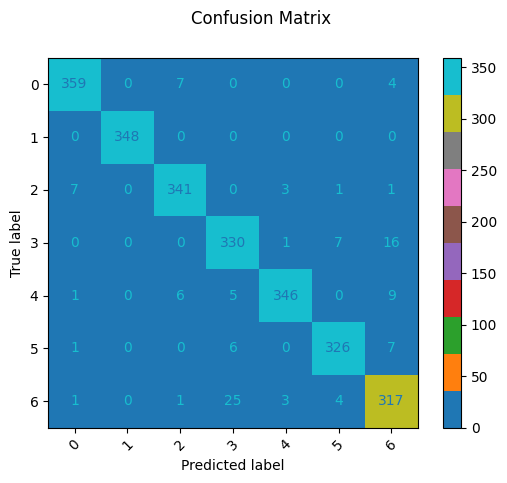

----------------------------------------------------------------
Results on the test set for SVM are:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       370
           1       1.00      1.00      1.00       348
           2       0.96      0.97      0.96       353
           3       0.90      0.93      0.92       354
           4       0.98      0.94      0.96       367
           5       0.96      0.96      0.96       340
           6       0.90      0.90      0.90       351

    accuracy                           0.95      2483
   macro avg       0.95      0.95      0.95      2483
weighted avg       0.95      0.95      0.95      2483

----------------------------------------------------------------
TRAIN PERFORMANCE FOR SVM
Accuracy = 0.959
Precision = 0.959
Recall = 0.959
F1 Score = 0.959
----------------------------------------------------------------
TEST PERFORMANCE FOR SVM
Accuracy = 0.953
Error Rate = 0.047
Precision = 0.953

In [97]:
svm_report=evaluate_model(svm_optimized_model,y_train_pred_svm,y_test_pred_svm,y_test=y_test,name="SVM") # giving y train predicted and y test predicted for SVM model evaluation to a function evaluate_model

### **Decision Tree Model Performance**

Confusion matrix for Decision Tree:
 [[347   1  14   1   1   1   5]
 [  0 348   0   0   0   0   0]
 [ 12   0 335   0   3   0   3]
 [  0   0   0 315   2   9  28]
 [  4   0   5   1 350   0   7]
 [  0   0   0   8   0 327   5]
 [  2   0   2  18  11   9 309]]


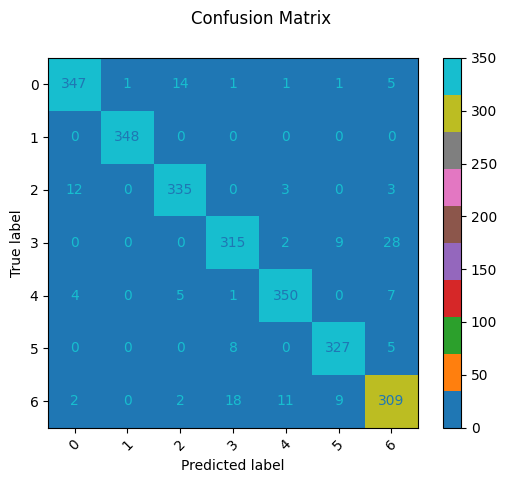

----------------------------------------------------------------
Results on the test set for Decision Tree are:
              precision    recall  f1-score   support

           0       0.95      0.94      0.94       370
           1       1.00      1.00      1.00       348
           2       0.94      0.95      0.94       353
           3       0.92      0.89      0.90       354
           4       0.95      0.95      0.95       367
           5       0.95      0.96      0.95       340
           6       0.87      0.88      0.87       351

    accuracy                           0.94      2483
   macro avg       0.94      0.94      0.94      2483
weighted avg       0.94      0.94      0.94      2483

----------------------------------------------------------------
TRAIN PERFORMANCE FOR Decision Tree
Accuracy = 0.964
Precision = 0.964
Recall = 0.964
F1 Score = 0.964
----------------------------------------------------------------
TEST PERFORMANCE FOR Decision Tree
Accuracy = 0.939
Error 

In [98]:
decisiontree_report=evaluate_model(decisiontree_optimized_model,y_train_pred_decisiontree,y_test_pred_decisiontree,y_test=y_test,name="Decision Tree") # giving y train predicted and y test predicted for Decision Tree model evaluation to a function evaluate_model

### **Knn Model Performance**

Confusion matrix for KNN:
 [[357   0   9   0   0   0   4]
 [  0 348   0   0   0   0   0]
 [  3   0 347   0   1   0   2]
 [  0   0   0 322   1   9  22]
 [  0   0   8   0 350   0   9]
 [  0   0   0   4   0 332   4]
 [  0   0   1  22   8   4 316]]


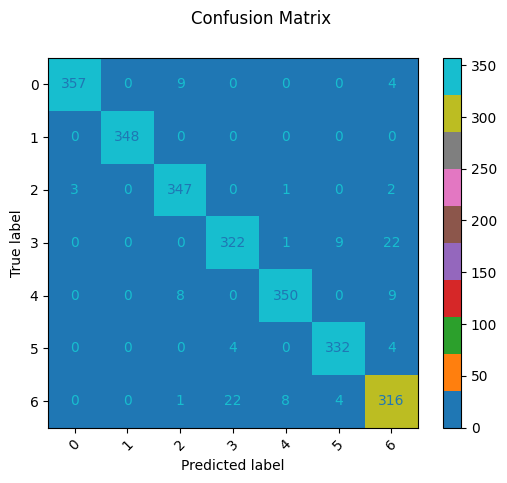

----------------------------------------------------------------
Results on the test set for KNN are:
              precision    recall  f1-score   support

           0       0.99      0.96      0.98       370
           1       1.00      1.00      1.00       348
           2       0.95      0.98      0.97       353
           3       0.93      0.91      0.92       354
           4       0.97      0.95      0.96       367
           5       0.96      0.98      0.97       340
           6       0.89      0.90      0.89       351

    accuracy                           0.96      2483
   macro avg       0.96      0.96      0.96      2483
weighted avg       0.96      0.96      0.96      2483

----------------------------------------------------------------
TRAIN PERFORMANCE FOR KNN
Accuracy = 1.0
Precision = 1.0
Recall = 1.0
F1 Score = 1.0
----------------------------------------------------------------
TEST PERFORMANCE FOR KNN
Accuracy = 0.955
Error Rate = 0.045
Precision = 0.955
Recall 

In [99]:
knn_report=evaluate_model(knn_optimized_model,y_train_pred_knn,y_test_pred_knn,y_test=y_test,name="KNN") # giving y train predicted and y test predicted for Knn model evaluation to a function evaluate_model

# **Model Comparision and Saving Model Performance**

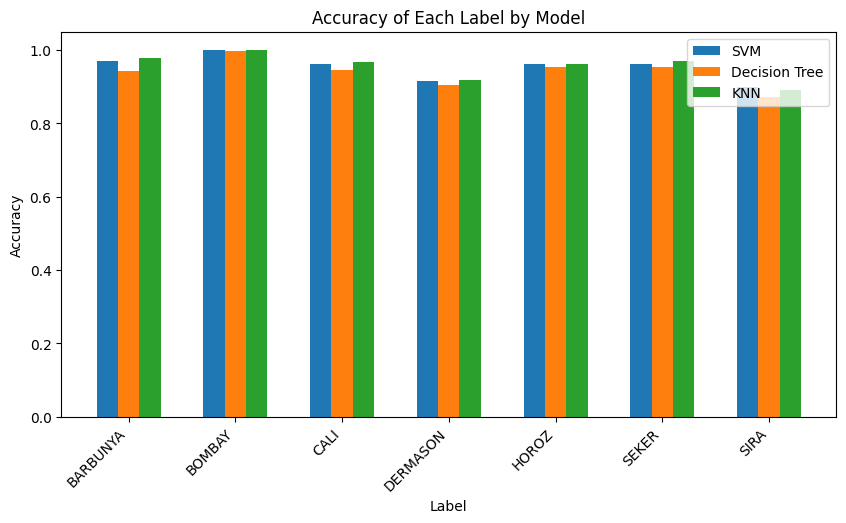

In [128]:
labels = ['0', '1', '2', '3', '4', '5', '6']
 
accuracies_svm = [svm_report[label]['f1-score'] for label in labels]                      #retrieving the accuracy of svm model for each label
accuracies_decisiontree = [decisiontree_report[label]['f1-score'] for label in labels]    #retrieving the accuracy of decision tree model for each label
accuracies_knn = [knn_report[label]['f1-score'] for label in labels]                       #retrieving the accuracy of knn model for each label

x = np.arange(len(labels))
width = 0.2
fig, ax = plt.subplots(figsize=(10,5))                                                          #give fiure size of subplot
rects1 = ax.bar(x - width, accuracies_svm, width, label='SVM')                              # creating a bar plot for SVM accuracies, positioning the bars to the left of the x-coordinates
rects2 = ax.bar(x, accuracies_decisiontree, width, label='Decision Tree')                   # creating a bar plot for Decision Tree accuracies, positioning the bars to the left of the x-coordinates
rects3 = ax.bar(x + width, accuracies_knn, width, label='KNN')                              # creating a bar plot for KNN accuracies, positioning the bars to the left of the x-coordinates

ax.set_xlabel('Label')                                                                         # Set x label
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy of Each Label by Model')                                               # Set y label
ax.set_xticks(x)
ax.set_xticklabels([label_mapping[int(label)] for label in labels])
plt.xticks(rotation=45, ha='right')                                                           # Rotate x label 45 degree
ax.legend(loc='upper right')                                                                  #Set legend position
plt.show()


The graph above makes it quite evident that KNN, SVM, and decision trees, in that order, yield the highest levels of accuracy. KNN has a 95.5% accuracy rate, whereas SVM has a little lower accuracy of 95.3% and Decision Tree model has a 93.9% accuracy rate.

In [135]:
label_mapping = { 0: 'BARBUNYA', 1: 'BOMBAY',2: 'CALI',3: 'DERMASON', 4: 'HOROZ',5: 'SEKER', 6: 'SIRA'} # original label dictionary

In [144]:
y_test

5716     4
11812    3
8487     6
19893    2
20554    2
        ..
23814    5
4148     2
2662     0
20194    2
23181    5
Name: Class, Length: 2483, dtype: int64

In [140]:
y_test_pred_name_knn = [label_mapping[label] for label in y_test_pred_knn] #converting the encoded label back to its original name
# y_test_actual_knn = [label_mapping[label] for label in y_test]

In [173]:
output = pd.DataFrame({'y_test_actual_index': y_test.index,
                      'y_test_predicted': y_test_pred_name_knn})
output.to_csv('/content/drive/MyDrive/Sussex/SEM_2/Machine_Learning/Assignment/DryBeanDataset/automatic_detection_output.csv', index=False) # Saving the output in csv file with index and predicted value

In [170]:
joblib.dump(model, '/content/drive/MyDrive/Sussex/SEM_2/Machine_Learning/Assignment/DryBeanDataset/knnmodel.pkl') #saving the model with th help of joblib

['/content/drive/MyDrive/Sussex/SEM_2/Machine_Learning/Assignment/DryBeanDataset/knnmodel.pkl']

# **References**

* archive.ics.uci.edu. (n.d.). UCI Machine Learning Repository: Dry Bean Dataset Data Set. [online] Available at: https://archive.ics.uci.edu/ml/datasets/Dry+Bean+Dataset.

* KOKLU, M. and OZKAN, I.A., (2020), “Multiclass Classification of Dry Beans Using Computer Vision and Machine Learning Techniques.” Computers and Electronics in Agriculture, 174, 105507.
DOI: https://doi.org/10.1016/j.compag.2020.105507

* Proclus Academy. (n.d.). Precision, Recall, and F1 Score: A Practical Guide Using Scikit-Learn. [online] Available at: https://proclusacademy.com/blog/practical/precision-recall-f1-score-sklearn/.

*  Martulandi, A. (2019). K-Nearest Neighbors in Python + Hyperparameters Tuning. [online] Medium. Available at: https://medium.datadriveninvestor.com/k-nearest-neighbors-in-python-hyperparameters-tuning-716734bc557f.

*  Amy @GrabNGoInfo (2023). Support Vector Machine (SVM) Hyperparameter Tuning In Python. [online] GrabNGoInfo. Available at: https://medium.com/grabngoinfo/support-vector-machine-svm-hyperparameter-tuning-in-python-a65586289bcb.

* Yadav, A. (2018). SUPPORT VECTOR MACHINES(SVM). [online] Medium. Available at: https://towardsdatascience.com/support-vector-machines-svm-c9ef22815589#:~:text=Support%20vector%20machines%20so%20called [Accessed 12 May 2023].

* Exsilio Blog. (2016). Accuracy, Precision, Recall & F1 Score: Interpretation of Performance Measures. [online] Available at: https://blog.exsilio.com/all/accuracy-precision-recall-f1-score-interpretation-of-performance-measures/#:~:text=F1%20score%20%2D%20F1%20Score%20is.

* www.turing.com. (n.d.). Precision Recall Method - Outcome for your ML Model. [online] Available at: https://www.turing.com/kb/precision-recall-method [Accessed 10 Nov. 2022].
